<a href="https://colab.research.google.com/github/sharad28/Fun_implementation/blob/main/NLP/letter-embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import urllib.request as req

In [2]:
#download csv file from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SYBGZL
filename = '/content/abcnews-date-text.csv'

In [3]:
headlines = pd.read_csv(filename)
headlines = headlines['headline_text']

In [4]:
headlines.head()    

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [5]:
def sliding_window(text):
  N = len(text) - 1
  for i in range(N):
    yield text[i],text[i+1]


In [6]:
import itertools as it

In [7]:
window = list(it.chain(*[sliding_window(txt) for txt in headlines[:10000]]))

In [8]:
char = pd.DataFrame(window)[0].unique()

In [9]:
mapping = {char : idx for idx,char in enumerate(char) }


In [10]:
# [mapping[w[0]] for w in window]

In [11]:
integer_in = np.array([mapping[w[0]] for w in window])

In [12]:
integer_out = np.array([mapping[w[1]] for w in window])

In [13]:
num_letters = len(mapping)
num_letters

37

In [14]:
emb_layer = tf.keras.layers.Embedding(num_letters,2,input_length=1 )
model = tf.keras.Sequential(emb_layer)

In [15]:
out_array = model.predict(integer_in)
out_array.shape

(386880, 1, 2)

In [16]:
import matplotlib.pyplot as plt



In [17]:
idx_of_char = np.array(list(mapping.values())) 
idx_of_char 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [18]:
translator = {idx:char for char,idx in mapping.items()}


In [19]:
idx_of_char = np.array([list(mapping.values())]).T 
idx_of_char.shape 


(37, 1)

In [20]:

preds = model.predict(idx_of_char)


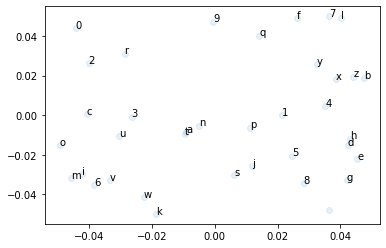

In [21]:
plt.scatter(preds[:,0,0],preds[:,0,1],alpha=.1)
for i , idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1],translator[idx[0]])
plt.show()  

In [22]:

layers = [
    emb_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_letters,activation='softmax')
]
model_pred = tf.keras.Sequential(layers) 

In [23]:
model_pred.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 2)              74        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 37)                111       
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [24]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_pred.compile(adam,"categorical_crossentropy",metrics=['accuracy'])

In [25]:
out = model_pred.predict(integer_in)
out.shape

(386880, 37)

In [26]:
integer_out.shape

(386880,)

In [27]:
from sklearn.preprocessing import OneHotEncoder
integer_out = integer_out.reshape(-1,1)
integer_out.shape

(386880, 1)

In [28]:
to_predict = OneHotEncoder(sparse=False).fit_transform(integer_out)
to_predict

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
model_pred.fit(integer_in, to_predict, epochs=30)

Epoch 1/30
12090/12090 [==============================] - 24s 2ms/step - loss: 2.7619 - accuracy: 0.1781
Epoch 2/30
12090/12090 [==============================] - 20s 2ms/step - loss: 2.6755 - accuracy: 0.1917
Epoch 3/30
12090/12090 [==============================] - 19s 2ms/step - loss: 2.6703 - accuracy: 0.1913
Epoch 4/30
12090/12090 [==============================] - 20s 2ms/step - loss: 2.6687 - accuracy: 0.1917
Epoch 5/30
12090/12090 [==============================] - 19s 2ms/step - loss: 2.6678 - accuracy: 0.1962
Epoch 6/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6673 - accuracy: 0.1958
Epoch 7/30
12090/12090 [==============================] - 20s 2ms/step - loss: 2.6668 - accuracy: 0.1961
Epoch 8/30
12090/12090 [==============================] - 19s 2ms/step - loss: 2.6664 - accuracy: 0.1963
Epoch 9/30
12090/12090 [==============================] - 19s 2ms/step - loss: 2.6660 - accuracy: 0.1963
Epoch 10/30
12090/12090 [==============================

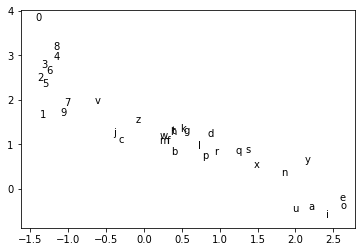

In [31]:
preds = model.predict(idx_of_char)
plt.scatter(preds[:,0,0],preds[:,0,1],alpha=0)
for i , idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1],translator[idx[0]])
plt.show()